<a href="https://colab.research.google.com/github/farhanbudi/Image-Classification/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Classification Using ANN Model and Tensorflow Framework

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# import required libraries
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
# connect to drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Extract the zip file
import zipfile,os
local_zip = 'drive/MyDrive/Lamaran/Portofolio_Image_Classification/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [5]:
pip install split-folders

In [6]:
# split folder to divide data into train, validation, and test data
import splitfolders
splitfolders.ratio('/tmp/rockpaperscissors/rps-cv-images', output="/tmp/rockpaperscissors/data",
                   seed=1337, ratio=(.6, .2, .2))

Copying files: 2188 files [00:00, 2808.22 files/s]


In [7]:
# check whether the data has been divided into 3 in the dataset
os.listdir('/tmp/rockpaperscissors/data')

['test', 'train', 'val']

In [8]:
# Create a new directory for validation data and training data
output_new = "/tmp/rockpaperscissors/data"

train_dir = os.path.join(output_new, 'train')
val_dir = os.path.join(output_new, 'val')
test_dir = os.path.join(output_new, 'test')

In [9]:
# copy test data to drive
!cp -r /tmp/rockpaperscissors/data/test drive/MyDrive/Lamaran/Portofolio_Image_Classification

In [10]:
# Perform image augmentation
datagen = ImageDataGenerator(
                rescale = 1./255, 
                rotation_range = 20, 
                horizontal_flip = True, 
                shear_range = 0.4,
                fill_mode='nearest')

In [11]:
# Prepare train data and validation data
train_generator = datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical')

validation_generator = datagen.flow_from_directory(
        val_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical')

test_generator = datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical')

Found 1312 images belonging to 3 classes.
Found 437 images belonging to 3 classes.
Found 439 images belonging to 3 classes.


In [12]:
# Define CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [13]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [14]:
# train CNN model
model.fit(
      train_generator,
      steps_per_epoch=25,
      epochs=10,
      validation_data=validation_generator, # display validation data test accuracy
      validation_steps=5,  # how many batches will be executed in each epoch
      verbose=2)

Epoch 1/10
25/25 - 49s - loss: 1.0940 - accuracy: 0.3525 - val_loss: 0.9911 - val_accuracy: 0.5375
Epoch 2/10
25/25 - 44s - loss: 0.8865 - accuracy: 0.5975 - val_loss: 0.6823 - val_accuracy: 0.7375
Epoch 3/10
25/25 - 44s - loss: 0.4795 - accuracy: 0.8288 - val_loss: 0.2074 - val_accuracy: 0.9312
Epoch 4/10
25/25 - 44s - loss: 0.2291 - accuracy: 0.9200 - val_loss: 0.2135 - val_accuracy: 0.9187
Epoch 5/10
25/25 - 44s - loss: 0.2140 - accuracy: 0.9262 - val_loss: 0.1821 - val_accuracy: 0.9375
Epoch 6/10
25/25 - 44s - loss: 0.2065 - accuracy: 0.9337 - val_loss: 0.1894 - val_accuracy: 0.9125
Epoch 7/10
25/25 - 44s - loss: 0.1973 - accuracy: 0.9400 - val_loss: 0.2420 - val_accuracy: 0.9062
Epoch 8/10
25/25 - 44s - loss: 0.1553 - accuracy: 0.9375 - val_loss: 0.1807 - val_accuracy: 0.9125
Epoch 9/10
25/25 - 44s - loss: 0.1385 - accuracy: 0.9488 - val_loss: 0.1141 - val_accuracy: 0.9625
Epoch 10/10
25/25 - 46s - loss: 0.1518 - accuracy: 0.9475 - val_loss: 0.0824 - val_accuracy: 0.9812


In [15]:
# Determine index for paper, rock, and scissors class
print(train_generator.class_indices)

{'paper': 0, 'rock': 1, 'scissors': 2}


In [16]:
score = model.evaluate(test_generator, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.219428151845932
Test accuracy: 0.9316628575325012


Saving 3UH9T0W1eZQW36xF.png to 3UH9T0W1eZQW36xF.png
3UH9T0W1eZQW36xF.png
scissors


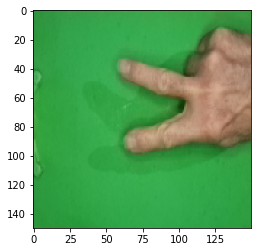

In [17]:
# Doing image prediction
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  hasil = np.argmax(classes)
  if hasil == 0:
    print('paper')
  elif hasil == 1:
    print('rock')
  else:
    print('scissors')

In [19]:
# Save the model
# model.save('cnn_model.h5')